#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    

# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    
# 解答：
    Loss function對訓練收斂速度的影響

# 導入必要的函數

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

def evaluate_model(model):
    #模型訓練, "Train_History" 把訓練過程所得到的數值存起來
    train_history=model.fit(x = x_img_train_normalize,
                                    y = y_label_train_OneHot,
                                    epochs=12, batch_size=128, 
                                    validation_data=[x_img_test_normalize, y_label_test_OneHot],
                                    verbose=1)     
    show_train_history(train_history, 'acc','val_acc')


作業: 
1. 請分別選用
    - "MSE"
    - "binary _crossentropy"
2. 查看Train/test accurancy and loss rate

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 4s 88us/step - loss: 0.0904 - acc: 0.1062 - val_loss: 0.0898 - val_acc: 0.1337
Epoch 2/12
50000/50000 [==============================] - 3s 63us/step - loss: 0.0900 - acc: 0.1142 - val_loss: 0.0897 - val_acc: 0.1405
Epoch 3/12
50000/50000 [==============================] - 3s 66us/step - loss: 0.0898 - acc: 0.1222 - val_loss: 0.0896 - val_acc: 0.1484
Epoch 4/12
50000/50000 [==============================] - 3s 63us/step - loss: 0.0897 - acc: 0.1288 - val_loss: 0.0895 - val_acc: 0.1598
Epoch 5/12
50000/50000 [==============================] - 3s 62us/step - loss: 0.0895 - acc: 0.1401 - val_loss: 0.0894 - val_acc: 0.1719
Epoch 6/12
50000/50000 [==============================] - 3s 64us/step - loss: 0.0894 - acc: 0.1436 - val_loss: 0.0893 - val_acc: 0.1805
Epoch 7/12
50000/50000 [==============================] - 3s 67us/step - loss: 0.0892 - acc: 0.1502 - val_loss: 0.0892 - val_acc

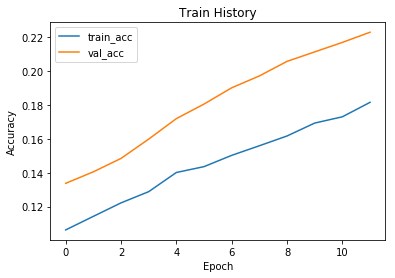

In [23]:
initial_weights = model.get_weights()
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
evaluate_model(model)

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 4s 73us/step - loss: 2.1204 - acc: 0.2228 - val_loss: 1.9935 - val_acc: 0.3228
Epoch 2/12
50000/50000 [==============================] - 3s 66us/step - loss: 1.8952 - acc: 0.3238 - val_loss: 1.8601 - val_acc: 0.3803
Epoch 3/12
50000/50000 [==============================] - 3s 64us/step - loss: 1.7450 - acc: 0.3799 - val_loss: 1.7325 - val_acc: 0.4299
Epoch 4/12
50000/50000 [==============================] - 3s 66us/step - loss: 1.6411 - acc: 0.4123 - val_loss: 1.6459 - val_acc: 0.4533
Epoch 5/12
50000/50000 [==============================] - 3s 65us/step - loss: 1.5615 - acc: 0.4411 - val_loss: 1.5781 - val_acc: 0.4786
Epoch 6/12
50000/50000 [==============================] - 3s 67us/step - loss: 1.4955 - acc: 0.4632 - val_loss: 1.5097 - val_acc: 0.5022
Epoch 7/12
50000/50000 [==============================] - 3s 64us/step - loss: 1.4472 - acc: 0.4816 - val_loss: 1.5173 - val_acc

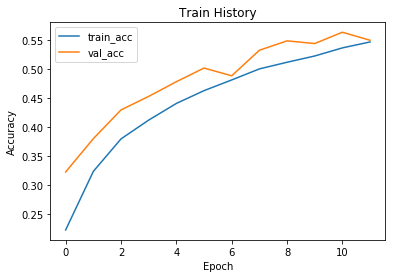

In [24]:
model.set_weights(initial_weights)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
evaluate_model(model)